In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_user=pd.read_csv('../../All_datasets/movieLens/ml-100k/u.data',sep='\t',names=['user_id','item_it','rating','timestamp'])
df_user.head()

,user_id,item_it,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
df_user.shape

(100000, 4)

In [4]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id      100000 non-null int64
item_it      100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
no_user=len(df_user.user_id.unique())
no_movie=len(df_user.item_it.unique())
print(no_user,no_movie)

943 1682


In [6]:
df_user.user_id=df_user.user_id.astype('category').cat.codes.values
df_user.item_it=df_user.item_it.astype('category').cat.codes.values
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id      100000 non-null int16
item_it      100000 non-null int16
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int16(2), int64(2)
memory usage: 1.9 MB


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df_train,df_test=train_test_split(df_user,test_size=0.2)

In [9]:
df_train.head()

,user_id,item_it,rating,timestamp
8772,129,404,4,875801984
89306,446,951,4,878854315
98705,795,273,5,893047167
83935,880,848,2,876539051
33763,428,149,5,882385569


In [10]:
df_test.head()

,user_id,item_it,rating,timestamp
86527,869,420,2,879539965
79413,787,181,2,880868599
33247,565,479,4,881649471
52557,708,384,4,879848397
70144,121,56,2,879270644


In [11]:
import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot
n_users, n_movies = len(df_user.user_id.unique()), len(df_user.item_it.unique())
n_latent_factors_user = 5
n_latent_factors_movie = 8


Using TensorFlow backend.


In [12]:
movie_input = keras.layers.Input(shape=[1],name='Item')
movie_embedding=keras.layers.Embedding(n_movies,n_latent_factors_movie,name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)


In [13]:
user_input=keras.layers.Input(shape=[1],name='user')
user_embedding=keras.layers.Embedding(n_users,n_latent_factors_user,name='user-embedding')(user_input)
user_vec=keras.layers.Flatten(name='FlattenUser')(user_embedding)

In [14]:
concat = keras.layers.merge([movie_vec, user_vec], mode='concat',name='Concat')
concat_dropout = keras.layers.Dropout(0.2)(concat)
dense = keras.layers.Dense(200,name='FullyConnected')(concat)
dropout_1 = keras.layers.Dropout(0.2,name='Dropout')(dense)
dense_2 = keras.layers.Dense(100,name='FullyConnected-1')(concat)
dropout_2 = keras.layers.Dropout(0.2,name='Dropout')(dense_2)
dense_3 = keras.layers.Dense(50,name='FullyConnected-2')(dense_2)
dropout_3 = keras.layers.Dropout(0.2,name='Dropout')(dense_3)
dense_4 = keras.layers.Dense(20,name='FullyConnected-3', activation='relu')(dense_3)

result = keras.layers.Dense(1, activation='relu',name='Activation')(dense_4)

In [15]:
model=keras.Model(inputs=[user_input,movie_input],outputs=result)

In [16]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [42]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
user (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 8)         13456       Item[0][0]                       
__________________________________________________________________________________________________
user-embedding (Embedding)      (None, 1, 5)         4715        user[0][0]                       
__________________________________________________________________________________________________
FlattenMov

In [43]:
history = model.fit([df_train.user_id, df_train.item_it], df_train.rating, epochs=100, verbose=1)

Epoch 1/100
80000/80000 [==============================] - 3s 33us/step - loss: 1.0763 - acc: 0.3833
Epoch 2/100
80000/80000 [==============================] - 2s 30us/step - loss: 0.9050 - acc: 0.4039
Epoch 3/100
80000/80000 [==============================] - 2s 30us/step - loss: 0.8926 - acc: 0.4063
Epoch 4/100
80000/80000 [==============================] - 2s 30us/step - loss: 0.8834 - acc: 0.4108
Epoch 5/100
80000/80000 [==============================] - 2s 31us/step - loss: 0.8780 - acc: 0.4116
Epoch 6/100
80000/80000 [==============================] - 2s 30us/step - loss: 0.8738 - acc: 0.4140
Epoch 7/100
80000/80000 [==============================] - 2s 31us/step - loss: 0.8709 - acc: 0.4137
Epoch 8/100
80000/80000 [==============================] - 2s 30us/step - loss: 0.8651 - acc: 0.4154
Epoch 9/100
80000/80000 [==============================] - 2s 28us/step - loss: 0.8473 - acc: 0.4206
Epoch 10/100
80000/80000 [==============================] - 2s 28us/step - loss: 0.8299 - a

80000/80000 [==============================] - 2s 29us/step - loss: 0.6073 - acc: 0.5073
Epoch 82/100
80000/80000 [==============================] - 2s 30us/step - loss: 0.6063 - acc: 0.5086
Epoch 83/100
80000/80000 [==============================] - 2s 28us/step - loss: 0.6060 - acc: 0.5070
Epoch 84/100
80000/80000 [==============================] - 2s 28us/step - loss: 0.6047 - acc: 0.5081
Epoch 85/100
80000/80000 [==============================] - 2s 28us/step - loss: 0.6038 - acc: 0.5090
Epoch 86/100
80000/80000 [==============================] - 2s 30us/step - loss: 0.6039 - acc: 0.5082
Epoch 87/100
80000/80000 [==============================] - 2s 30us/step - loss: 0.6038 - acc: 0.5093
Epoch 88/100
80000/80000 [==============================] - 2s 29us/step - loss: 0.6034 - acc: 0.5105
Epoch 89/100
80000/80000 [==============================] - 2s 28us/step - loss: 0.6019 - acc: 0.5100
Epoch 90/100
80000/80000 [==============================] - 2s 30us/step - loss: 0.6023 - acc: 

Text(0,0.5,'Train Error')

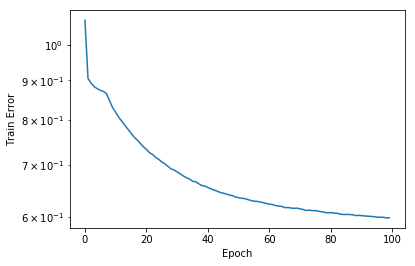

In [44]:
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")

In [45]:
y_hat = np.round(model.predict([df_test.user_id, df_test.item_it]))
y_true = df_test.rating

In [46]:
y_hat

array([[3.],
       [3.],
       [4.],
       ...,
       [4.],
       [3.],
       [4.]], dtype=float32)

In [47]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_hat)

0.72375

In [48]:
movie_embedding_learnt = model.get_layer(name='Movie-Embedding').get_weights()[0]
pd.DataFrame(movie_embedding_learnt).describe()

,0,1,2,3,4,5,6,7
count,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,-0.001695,0.079366,0.002669,-0.029291,-0.051349,0.025059,0.091173,-0.095547
std,0.449384,0.473199,0.433886,0.477468,0.483253,0.473012,0.459356,0.474021
min,-2.021945,-1.377661,-1.355344,-1.543949,-1.658329,-1.651288,-1.726299,-2.023817
25%,-0.277427,-0.218876,-0.300333,-0.341455,-0.365686,-0.291796,-0.211056,-0.420182
50%,0.013058,0.071566,-0.012669,-0.019779,-0.030364,0.032452,0.082329,-0.076452
75%,0.292705,0.380062,0.281151,0.281256,0.264600,0.340395,0.375639,0.211600
max,1.411662,1.770748,2.039587,1.712484,1.687408,1.811080,1.652964,1.467779


In [49]:
user_embedding_learnt = model.get_layer(name='user-embedding').get_weights()[0]
pd.DataFrame(user_embedding_learnt).describe()

,0,1,2,3,4
count,943.000000,943.000000,943.000000,943.000000,943.000000
mean,0.056660,-0.149241,-0.120716,0.195998,-0.093695
std,0.481809,0.497427,0.470606,0.516431,0.546638
min,-1.195316,-1.545477,-1.578388,-1.683116,-2.185485
25%,-0.274689,-0.487633,-0.393141,-0.140794,-0.443174
50%,0.030204,-0.125053,-0.108094,0.179807,-0.085652
75%,0.334645,0.191839,0.151893,0.517524,0.264494
max,1.691068,1.788750,2.245672,1.846101,1.671268


In [67]:
y_hat.shape

(20000, 1)

In [68]:
y_true.shape

(20000,)

In [70]:
y_hat

array([[ 4.],
       [ 1.],
       [ 3.],
       ..., 
       [ 3.],
       [ 2.],
       [ 3.]], dtype=float32)

In [71]:
model.predict([df_test.user_id, df_test.item_it])

array([[ 3.52577066],
       [ 0.73998749],
       [ 2.90842724],
       ..., 
       [ 2.57928753],
       [ 2.39206219],
       [ 3.26807737]], dtype=float32)

In [77]:
df_test.user_id.shape

(20000,)

In [78]:
df_test.item_it.shape

(20000,)

In [80]:
user_id = 3; movie_id = 5
model.predict([np.array([user_id]), np.array([movie_id])])

array([[ 4.5912652]], dtype=float32)

<Figure size 1080x720 with 0 Axes>

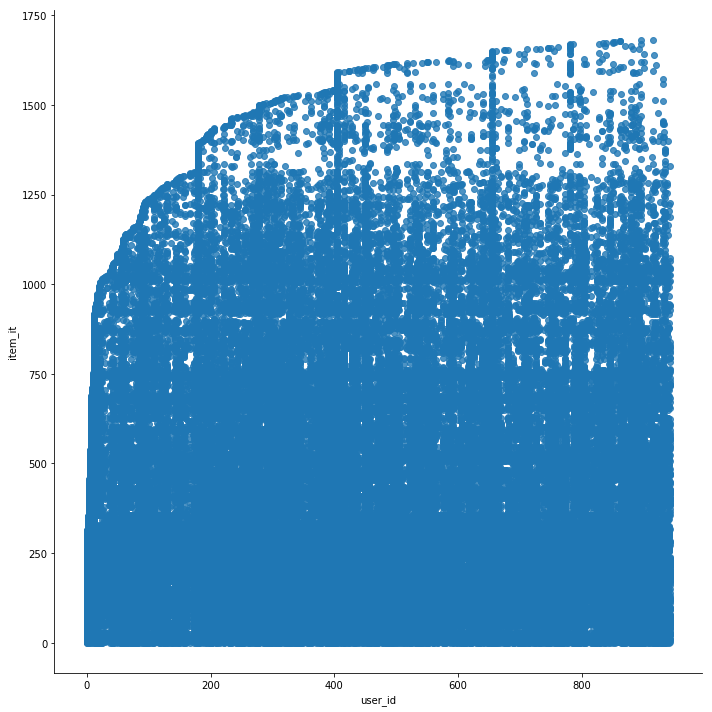

In [53]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(15,10))
sns.lmplot(x='user_id', y='item_it', data=df_user, fit_reg=False,size=10)

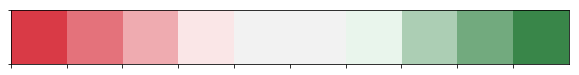

In [57]:
sns.palplot(sns.diverging_palette(10, 133, sep=80, n=10))

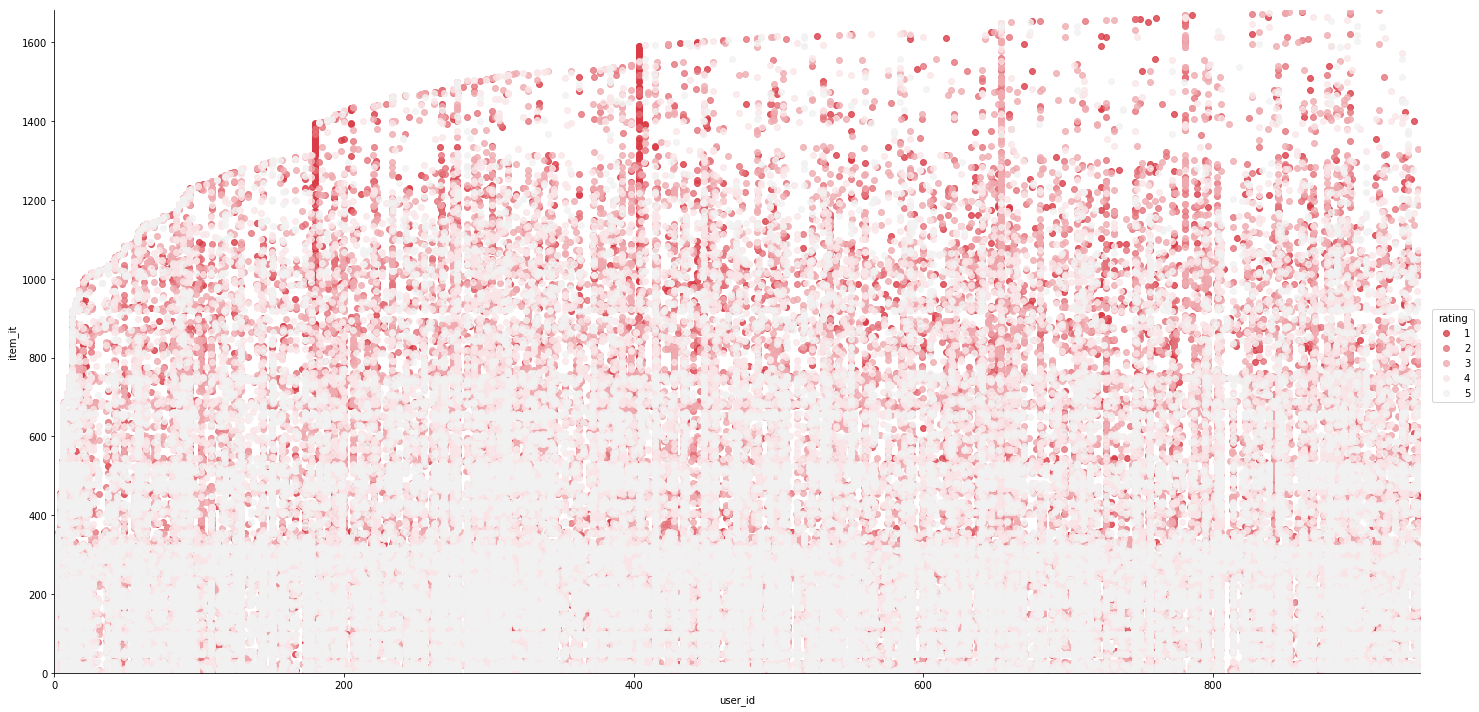

In [58]:
lm = sns.lmplot(x='user_id', y='item_it', hue='rating', data=df_user, fit_reg=False, size=10, aspect=2, palette=sns.diverging_palette(10, 133, sep=80, n=10))
axes = lm.axes
axes[0,0].set_ylim(0,1682) # max movieId is 163949
axes[0,0].set_xlim(0,943) # max userId is 671
lm

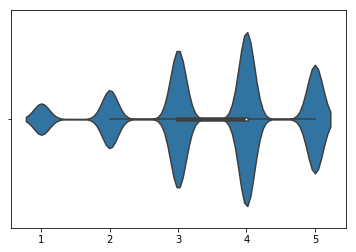

In [59]:
sns.violinplot([df_user.rating])